# Генерация данных

In [17]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
def plot_model_data(blue_data, red_data):
    pl.figure(figsize=(10, 10))
    pl.scatter(blue_data[:,0], blue_data[:,1], color="blue", alpha=0.3)
    pl.scatter(red_data[:,0], red_data[:,1], color="red", alpha=0.3)
    pl.show()

In [19]:
def generate_linear(point_count, slope, constant):
    points = np.random.rand(point_count, 2)
    above_index = slope * points[:, 0] + constant < points[:, 1]
    blue_data = points[above_index, :]
    red_data = points[~above_index, :]
    return blue_data, red_data

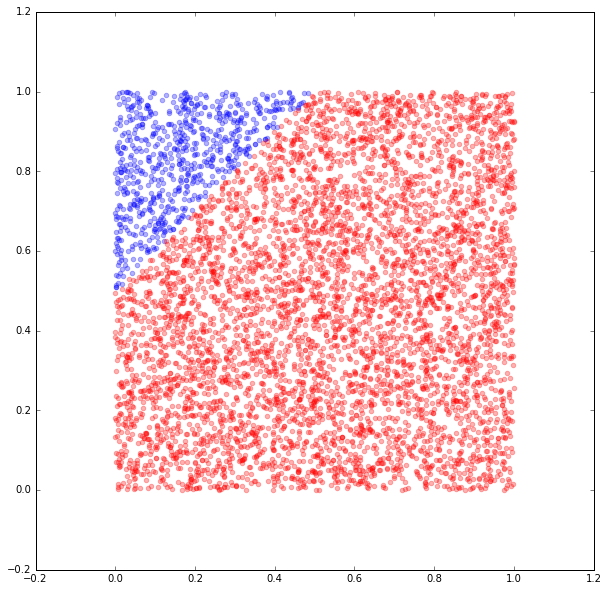

In [20]:
linear1, linerate2 = generate_linear(6000, 1, 0.5)
plot_model_data(linear1, linerate2)

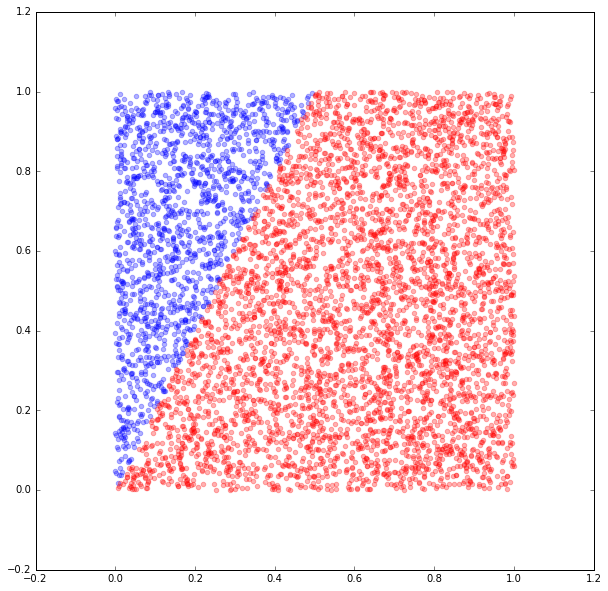

In [21]:
linear1, linerate2 = generate_linear(6000, 2, 0.0)
plot_model_data(linear1, linerate2)

In [22]:
def generate_circle(point_count, center, radius = 0.25):
    points = np.random.rand(point_count, 2)
    x, y = center
    inside_index = (points[:, 0] - x)**2 + (points[:, 1] - y)**2 <= (radius)**2
    blue_data = points[inside_index, :]
    red_data = points[~inside_index, :]
    return blue_data, red_data

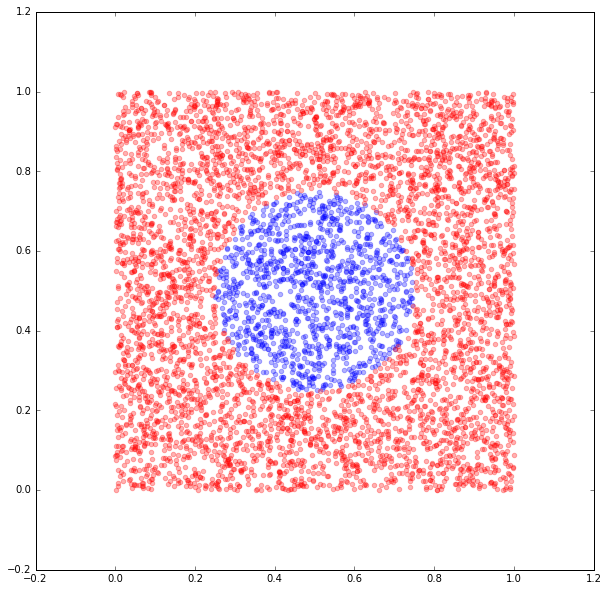

In [23]:
blue_data, red_data = generate_circle(6000, (0.5, 0.5))
plot_model_data(blue_data, red_data)

In [24]:
def generate_saw(point_count, width, height):
    points = np.random.rand(point_count, 2)
    subsaw_index = (points[:, 0] / width).astype(int)
    unit = points[:, 0] - subsaw_index * width
    below_index = points[:, 1] < 0.5 - 2.0 * (subsaw_index % 2 - 0.5) * (unit * 2 * height / width - height)
    blue_data = points[below_index, :]
    red_data = points[~below_index, :]
    return blue_data, red_data

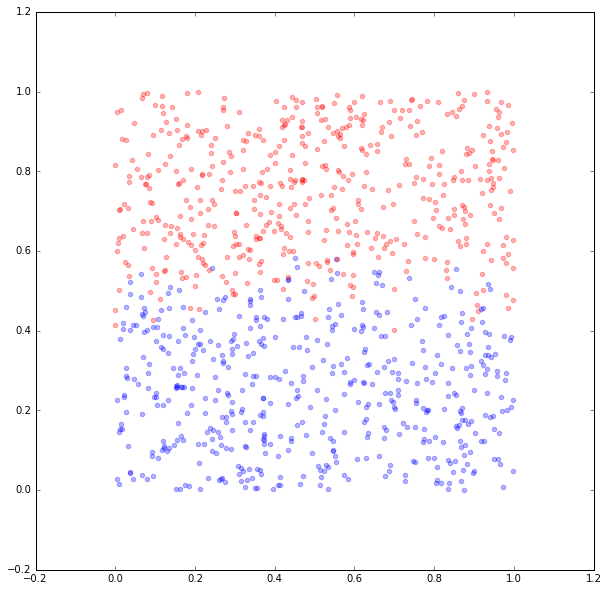

In [25]:
blue_data, red_data = generate_saw(1000, 0.05, 0.1)
plot_model_data(blue_data, red_data)

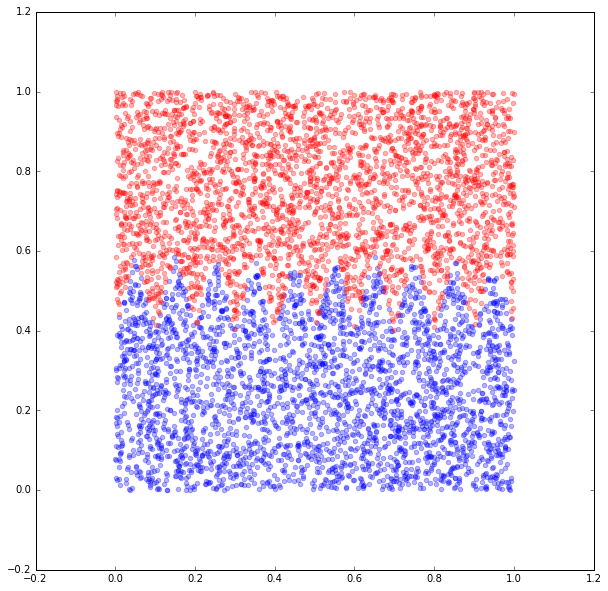

In [26]:
blue_data, red_data = generate_saw(6000, 0.05, 0.1)
plot_model_data(blue_data, red_data)

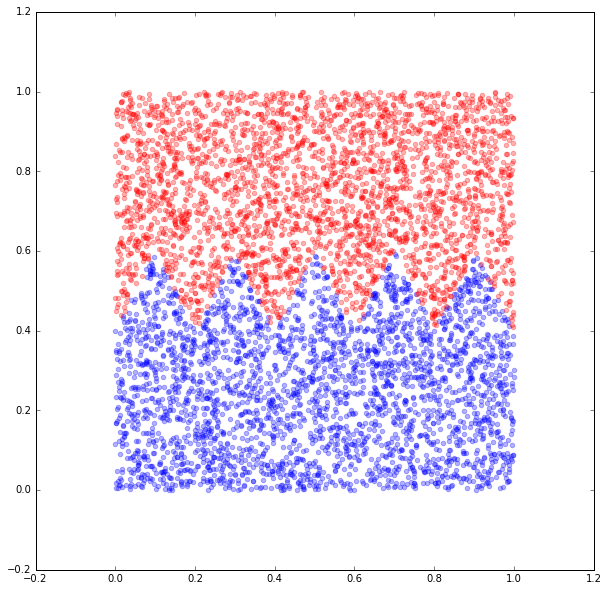

In [27]:
blue_data, red_data = generate_saw(6000, 0.1, 0.1)
plot_model_data(blue_data, red_data)

In [28]:
def generate_gaussian(point_count, mu, transform_matrix):
    """V = transform_matrix
    function: X = mu + V.T x X
    output: Normal(mu, V.T x V)
    """
    points = np.random.randn(point_count, 2)
    points = mu + np.dot(transform_matrix.T, points.T).T
    return points

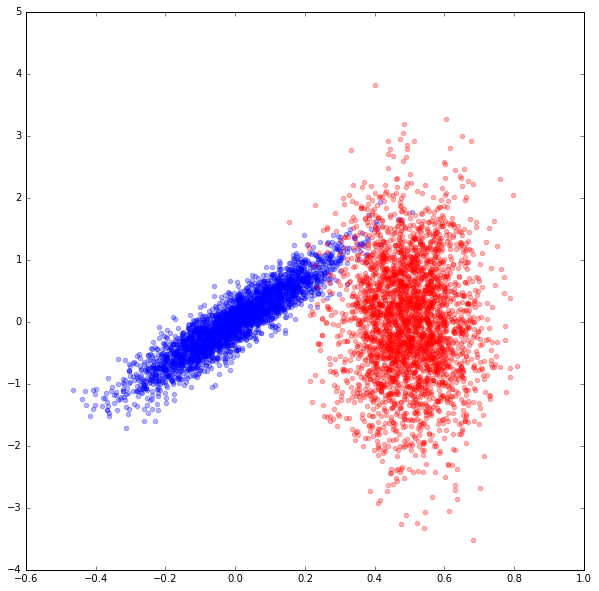

In [29]:
blue_data = generate_gaussian(3000, (0, 0), np.array([[0.1, 0.2], [0.1, 0.5]]))
red_data = generate_gaussian(3000, (0.5, 0), np.array([[0.1, 0], [0, 1.0]]))
plot_model_data(blue_data, red_data)

# kNN

In [30]:
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier as KNN

In [31]:
def generate_dataset(blue_data, red_data):
    """
    color_data:N x 2
    output: X (2N x 2), Y (2N)
    """
    X = np.r_[blue_data, red_data]
    Y = np.r_[np.zeros(blue_data.shape[0]), np.ones(red_data.shape[0])]
    return X, Y

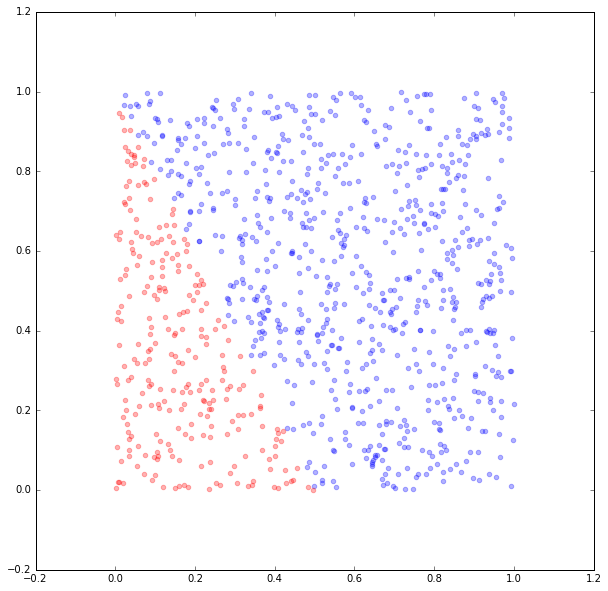

In [32]:
blue_data, red_data = generate_linear(1000, -2, 1)
plot_model_data(blue_data, red_data)

In [33]:
train_X, train_Y = generate_dataset(blue_data, red_data)

In [34]:
classifier = KNN(n_neighbors=1)
%time classifier.fit(train_X, train_Y)

Wall time: 27 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [35]:
classifier.predict(train_X) == train_Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [36]:
classifier.fit(train_X, train_Y)
blue_data, red_data = generate_linear(300, -2, 1)
test_X, test_Y = generate_dataset(blue_data, red_data)

In [37]:
classifier.predict(test_X) == test_Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [38]:
print classifier.score(train_X, train_Y)
print classifier.score(test_X, test_Y)

1.0
0.99


Обучим метод k ближайших соседей на примере двух нормальных распределений

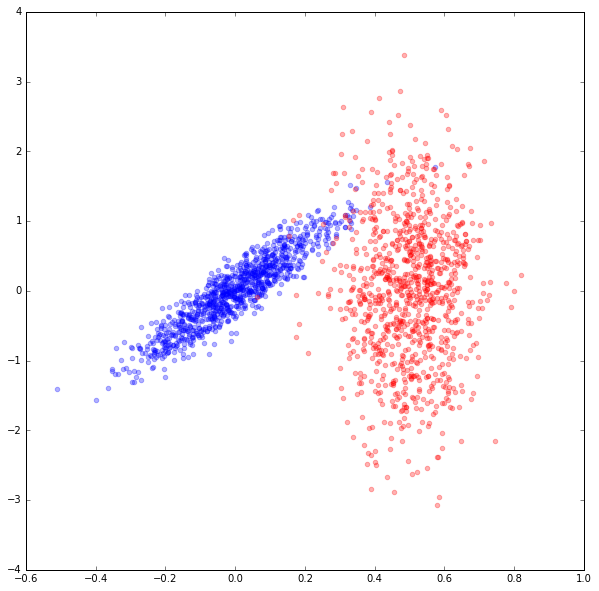

In [39]:
blue_data = generate_gaussian(1000, (0, 0), np.array([[0.1, 0.2], [0.1, 0.5]]))
red_data = generate_gaussian(1000, (0.5, 0), np.array([[0.1, 0], [0, 1.0]]))
plot_model_data(blue_data, red_data)

In [40]:
train_X, train_Y = generate_dataset(blue_data, red_data)

In [41]:
clf = KNN(n_neighbors=1)
clf.fit(train_X, train_Y)
print clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


Напишем функцию для генерации карты точек

In [42]:
def get_grid(data, border=1., step=.01):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

Визуализируем её

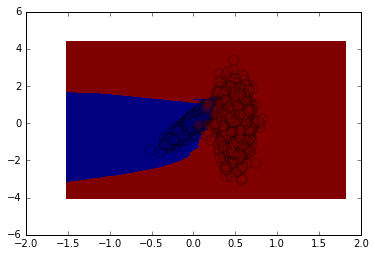

In [43]:
xx, yy = get_grid(train_X)
predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
pl.pcolormesh(xx, yy, predicted)
pl.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=100, alpha=0.3)

Изменим параметры визуализации

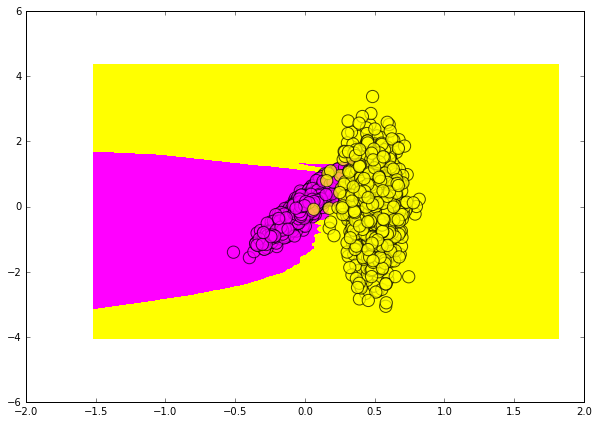

In [44]:
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='spring')
pl.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=150, cmap='spring', alpha=0.7)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


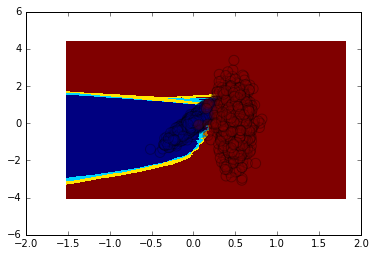

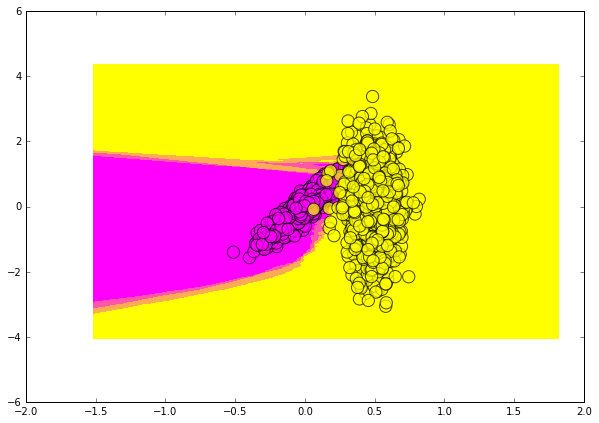

In [45]:
clf = KNN(n_neighbors=3)
clf.fit(train_X, train_Y)
print clf

xx, yy = get_grid(train_X)
predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
pl.pcolormesh(xx, yy, predicted)
pl.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=100, alpha=0.3)

pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='spring')
pl.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=150, cmap='spring', alpha=0.7)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


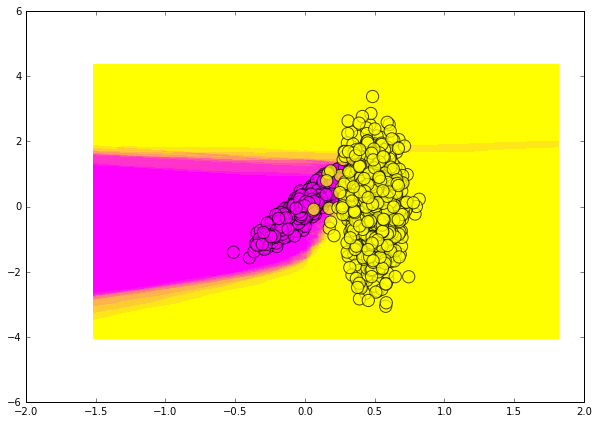

In [46]:
clf = KNN(n_neighbors=10)
clf.fit(train_X, train_Y)
print clf

xx, yy = get_grid(train_X)
predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='spring')
pl.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=150, cmap='spring', alpha=0.7)

# Cross Validation

In [47]:
for train_indices, test_indices in KFold(10, n_folds=3, shuffle=True):
    print train_indices, test_indices

[1 2 3 4 5 7] [0 6 8 9]
[0 1 4 6 7 8 9] [2 3 5]
[0 2 3 5 6 8 9] [1 4 7]


In [48]:
cv_strategy =  KFold(train_X.shape[0], n_folds=20, shuffle=True)
scoring = cross_val_score(classifier, train_X, train_Y, scoring='accuracy', cv=cv_strategy)
print scoring
print scoring.mean()
print scoring.std()

[ 0.96  0.98  1.    1.    0.99  0.97  1.    0.97  0.96  0.99  1.    0.98
  0.99  0.99  0.98  0.97  0.99  0.96  0.97  0.99]
0.982
0.013638181697


In [49]:
for train_indices, test_indices in ShuffleSplit(10, n_iter=2, test_size=0.2):
   print train_indices, test_indices

[1 3 0 7 8 2 9 5] [4 6]
[2 1 0 3 9 5 8 6] [7 4]


In [50]:
cv_strategy = ShuffleSplit(train_X.shape[0], n_iter=2, test_size=0.1, random_state=33)
scoring = cross_val_score(classifier, train_X, train_Y, scoring='accuracy', cv=cv_strategy)
print scoring
print scoring.mean()
print scoring.std()    

[ 0.99   0.965]
0.9775
0.0125


In [51]:
y = np.array([0, 1] * 5)
print y
for train_indices, test_indices in StratifiedKFold(y, n_folds=2):
    print train_indices, test_indices

[0 1 0 1 0 1 0 1 0 1]
[6 7 8 9] [0 1 2 3 4 5]
[0 1 2 3 4 5] [6 7 8 9]


In [52]:
cv_strategy = StratifiedKFold(train_Y, n_folds=3)
scoring = cross_val_score(classifier, train_X, train_Y, scoring='accuracy', cv=cv_strategy)
print scoring
print scoring.mean()
print scoring.std()    

[ 0.99101796  0.97747748  0.97747748]
0.981990973009
0.0063830465943
